This was my first time working with neural networks. I learned how to train the neural network but wasn't sure how to use my webcam to read in images until I came across a tutorial by Anmol Chawla. The webcam image part of this program was done by implementing his code.

In [2]:
#IMPORTED STUFF

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import TensorBoard

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import time
import cv2

In [3]:
#Loading the dataset

mnist = keras.datasets.mnist
(X_train, y_train), (X_test,y_test) = mnist.load_data()

X_train = keras.utils.normalize(X_train, axis=1)
X_test = keras.utils.normalize(X_test, axis=1)

11501568/11490434 [==============================] - 0s 0us/step


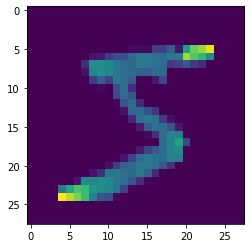

In [4]:
#Displaying the first training image
plt.imshow(X_train[0])

In [21]:
#Creating and training the neural network

model = keras.Sequential([
    layers.Flatten(),
    layers.Dense(128, activation= 'relu'),
    layers.Dense(128, activation= 'relu'),
    layers.Dense(10, activation = 'softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(
    X_train, y_train,
    epochs=4
)

Epoch 1/4
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2615 - accuracy: 0.9222
Epoch 2/4
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1070 - accuracy: 0.9673
Epoch 3/4
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0740 - accuracy: 0.9773
Epoch 4/4
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0520 - accuracy: 0.9835


In [22]:
#Checking Loss and Accuracy

val_loss, val_acc = model.evaluate(X_test, y_test)
print(val_loss, val_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.0925 - accuracy: 0.9727
0.09254954010248184 0.9726999998092651


In [23]:
#Saving the model
model.save('numreader_model')
numreader=keras.models.load_model('numreader_model')

preds = numreader.predict([X_test])

INFO:tensorflow:Assets written to: numreader_model/assets


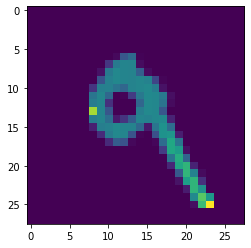

In [18]:
#Testing Predictions

plt.imshow(X_test[7])
plt.show()

In [20]:
print(np.argmax(preds[7]))

9


As we can see, the correct value of the test image was predicted so it's accurate.

Loading image from webcam. Thanks to Anmol Chawla: https://github.com/anmolchawla/MNSIT-Webcam-Tutorial 

In [10]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

Capturing image. 

<IPython.core.display.Javascript object>

Saved to photo.jpg


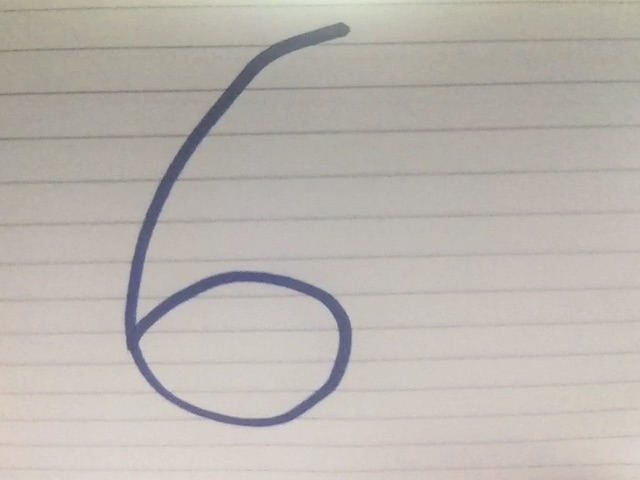

In [24]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

Note: I got a ValueError but managed to fix it by adding

```
user_test=user_test.reshape(-1,img_size,img_size) 
```
after

`user_test = tf.keras.utils.normalize(new_array, axis = 1)`



307200


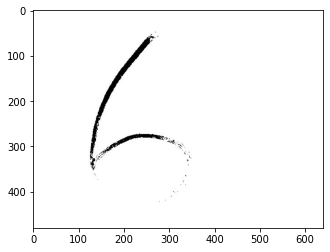

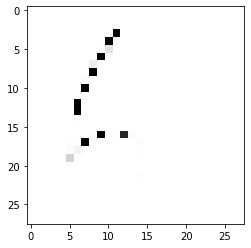

Probability Distribution for 0 0.029979909
Probability Distribution for 1 0.0001592474
Probability Distribution for 2 0.00064772426
Probability Distribution for 3 0.0071130283
Probability Distribution for 4 0.0070394007
Probability Distribution for 5 0.13600254
Probability Distribution for 6 0.4284239
Probability Distribution for 7 0.00047015908
Probability Distribution for 8 0.3660132
Probability Distribution for 9 0.024150835
The Predicted Value is 6


In [25]:
from PIL import Image
user_test = filename
col = Image.open(user_test)
gray = col.convert('L')
bw = gray.point(lambda x: 0 if x<100 else 255, '1')
bw.save("bw_image.jpg")
bw
img_array = cv2.imread("bw_image.jpg", cv2.IMREAD_GRAYSCALE)
img_array = cv2.bitwise_not(img_array)
print(img_array.size)
plt.imshow(img_array, cmap = plt.cm.binary)
plt.show()
img_size = 28
new_array = cv2.resize(img_array, (img_size,img_size))
plt.imshow(new_array, cmap = plt.cm.binary)
plt.show()
user_test = tf.keras.utils.normalize(new_array, axis = 1)
user_test=user_test.reshape(-1,img_size,img_size) 
predicted = numreader.predict([[user_test]])
a = predicted[0][0]
for i in range(0,10):
  b = predicted[0][i]
  print("Probability Distribution for",i,b)

print("The Predicted Value is",np.argmax(predicted[0]))

Predicted Value is 6 which is correct.